# Importar Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline

from sklearn.metrics import mean_squared_error as mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error as MAPE

import datetime
from datetime import datetime
from datetime import timedelta

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore', ConvergenceWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargar la Data

In [ ]:
# S&P 500 Desde Enero 2015 a Enero 2020 tomado de Yahoo Finance


df = pd.read_csv('/content/drive/MyDrive/SPY.csv', 
            parse_dates=['Date'],
            index_col=['Date'], 
            dayfirst=True)




In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-06,202.089996,202.720001,198.860001,199.820007,176.034042,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,178.227661,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,181.390289,147217800
2015-01-09,206.399994,206.419998,203.509995,204.250000,179.936707,158567300
2015-01-12,204.410004,204.600006,201.919998,202.649994,178.527176,144396100


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.shape

(1258, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-01-06 to 2020-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Visualizar el S&P500

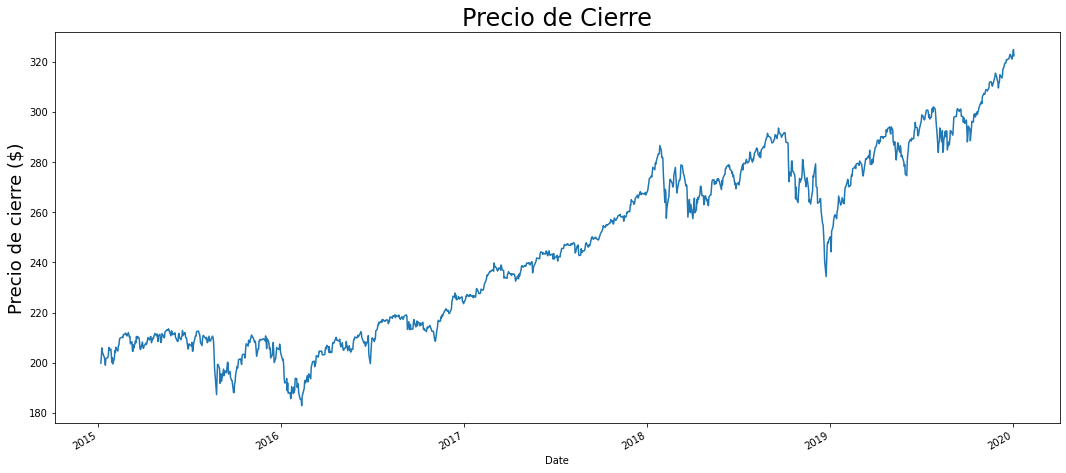

In [ ]:

#Gráfica Precio vs Año

df['Close'].plot(figsize=(18,8))
plt.title('Precio de Cierre', size =24)
#plt.xlabel('Año', size=18)
plt.ylabel('Precio de cierre ($)', size=18)
plt.show()

# Procesamiento de los datos

In [ ]:
# Borrar los valores NaN

df.dropna(inplace=True)

In [ ]:
df=df.resample(rule='D').mean()

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-06,202.089996,202.720001,198.860001,199.820007,176.034042,209151400.0
2015-01-07,201.419998,202.720001,200.880005,202.309998,178.227661,125346700.0
2015-01-08,204.009995,206.160004,203.990005,205.899994,181.390289,147217800.0
2015-01-09,206.399994,206.419998,203.509995,204.250000,179.936707,158567300.0
2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-30,322.950012,323.100006,320.549988,321.079987,312.140350,49729100.0
2019-12-31,320.529999,322.130005,320.149994,321.859985,312.898651,57077300.0
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,323.540009,324.890015,322.529999,324.869995,315.824829,59151200.0
2020-01-03,321.160004,323.640015,321.100006,322.410004,313.433380,77709700.0


In [ ]:
df = df.dropna()

In [ ]:
# Dropping everything else besides 'Close' and the Indicators

df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [ ]:
df.shape

(1258, 1)

## EDA

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


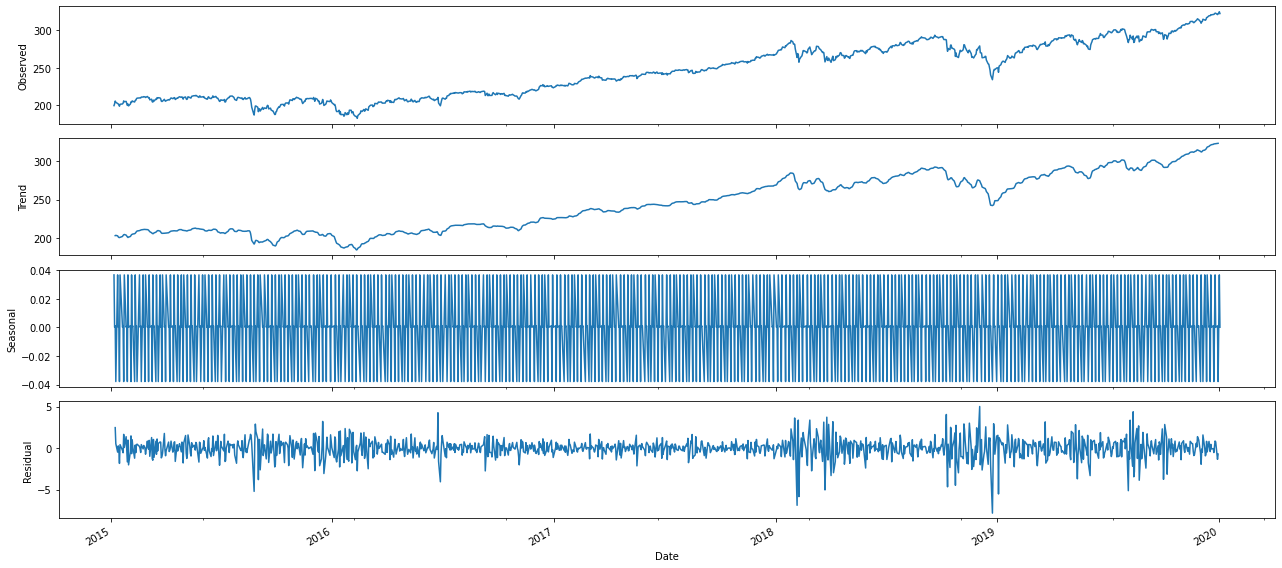

In [ ]:

rcParams['figure.figsize'] = 18, 8
seasonal_decompose(df,model='additive',freq=4).plot();
plt.show()


# Dividiendo la data

In [ ]:
# Separar la data  Train y Test

train = df[0:1004]
train.tail()

,Close
Date,
2018-12-24,234.339996
2018-12-26,246.179993
2018-12-27,248.070007
2018-12-28,247.750000
2018-12-31,249.919998


In [ ]:
train= train.reset_index()
train

,Date,Close
0,2015-01-06,199.820007
1,2015-01-07,202.309998
2,2015-01-08,205.899994
3,2015-01-09,204.250000
4,2015-01-12,202.649994
...,...,...
999,2018-12-24,234.339996
1000,2018-12-26,246.179993
1001,2018-12-27,248.070007
1002,2018-12-28,247.750000


In [ ]:
train.Timestamp = pd.to_datetime(train.Date, format= '%d/%m/%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()
train = train.dropna()
train.head()

,Close
Date,
2015-01-06,199.820007
2015-01-07,202.309998
2015-01-08,205.899994
2015-01-09,204.250000
2015-01-12,202.649994


In [ ]:
test = df[1004:]
test.head()

,Close
Date,
2019-01-02,250.179993
2019-01-03,244.210007
2019-01-04,252.389999
2019-01-07,254.380005
2019-01-08,256.769989


In [ ]:
test= test.reset_index()
test

,Date,Close
0,2019-01-02,250.179993
1,2019-01-03,244.210007
2,2019-01-04,252.389999
3,2019-01-07,254.380005
4,2019-01-08,256.769989
...,...,...
249,2019-12-27,322.859985
250,2019-12-30,321.079987
251,2019-12-31,321.859985
252,2020-01-02,324.869995


In [ ]:
test.Timestamp = pd.to_datetime(test.Date, format= '%d/%m/%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()
test = test.dropna()
test.tail()

,Close
Date,
2019-12-27,322.859985
2019-12-30,321.079987
2019-12-31,321.859985
2020-01-02,324.869995
2020-01-03,322.410004


# Holt-Winters

Suavizado exponencial

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']), seasonal_periods=7, trend='add', seasonal= 'mul',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
y_hat_avg

,Close,Holt_Winter
Date,,
2019-01-02,250.179993,249.937087
2019-01-03,244.210007,249.881054
2019-01-04,252.389999,250.040230
2019-01-07,254.380005,249.924160
2019-01-08,256.769989,250.032502
...,...,...
2019-12-27,322.859985,262.157312
2019-12-30,321.079987,262.320630
2019-12-31,321.859985,262.389618


# Visualización de las predicciones

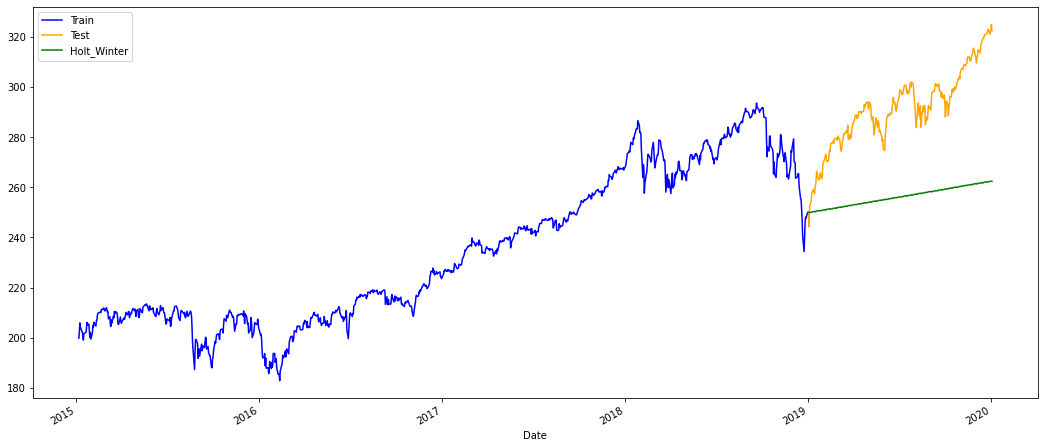

In [ ]:
train['Close'].plot(legend=True, label='Train', color='blue', figsize=(18,8))
test['Close'].plot(legend=True, label='Test', color='orange')

y_hat_avg['Holt_Winter'].plot(legend=True, label='Holt_Winter', color='green')
plt.show()



# Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))

In [ ]:
print('RMS = ', rms)

RMS =  37.13193369951143


In [ ]:
df['Close'].mean(), np.sqrt(df['Close'].var())

(245.3000315222576, 35.70333333045311)

# Modelo Final

In [ ]:

fit2 = ExponentialSmoothing(df, seasonal_periods=7, trend='add', seasonal= 'mul',).fit()
pred = fit2.forecast(360)

pred

1258    322.839166
1259    322.848191
1260    323.082146
1261    323.387025
1262    323.311768
           ...    
1613    357.425574
1614    357.084138
1615    357.497693
1616    357.497268
1617    357.745910
Length: 360, dtype: float64

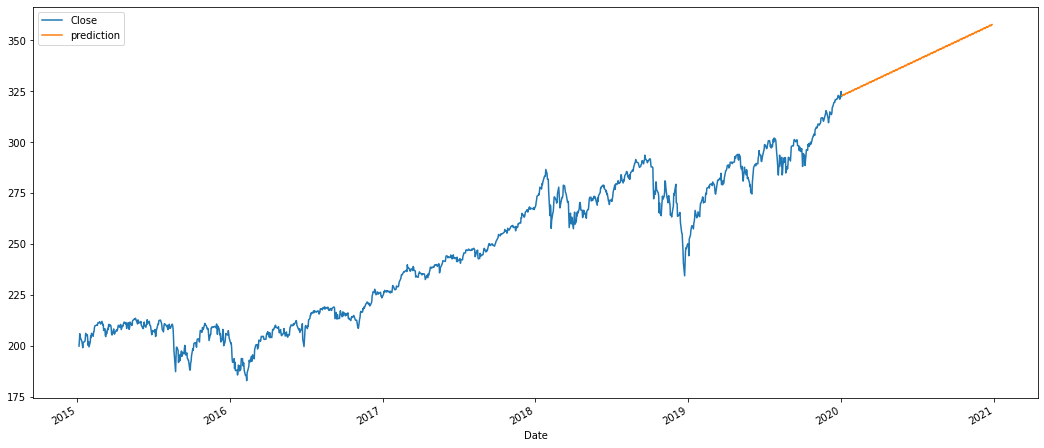

In [ ]:
pred.index = pd.date_range(start='2020-01-04', periods=360,freq='D')
df['Close'].plot(legend=True, label='Close', figsize=(18,8))
pred.plot(legend=True, label='prediction')
plt.show()